## Reading datasets

In [6]:
import pandas as pd
import numpy as np

In [273]:
df = pd.read_csv('Bakery_sales.csv')

In [275]:
df.head(5)

Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €

In [277]:
df=df[['date','time','ticket_number','article','Quantity','unit_price']]

In [279]:
df.shape

(234005, 6)

## Cleaning Dataset

### renaming columns for convenience

In [283]:
df = df.rename(columns={'unit_price': 'price', 'Quantity': 'quantity'})

In [285]:
df.head(5)

date   time  ticket_number               article  quantity   price
0  2021-01-02  08:38       150040.0              BAGUETTE       1.0  0,90 €
1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT       3.0  1,20 €
2  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT       2.0  1,20 €
3  2021-01-02  09:14       150041.0                  PAIN       1.0  1,15 €
4  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE       5.0  1,20 €

In [287]:
df.describe()

ticket_number       quantity
count  234005.000000  234005.000000
mean   219201.258738       1.538377
std     40053.223896       1.289603
min    150040.000000    -200.000000
25%    184754.000000       1.000000
50%    218807.000000       1.000000
75%    253927.000000       2.000000
max    288913.000000     200.000000

In [289]:
df.dtypes

date              object
time              object
ticket_number    float64
article           object
quantity         float64
price             object
dtype: object

### changing columns into appropriate datatypes

In [292]:
df['quantity'] = df['quantity'].astype(int)

In [294]:
df.dtypes

date              object
time              object
ticket_number    float64
article           object
quantity           int64
price             object
dtype: object

In [296]:
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M')

In [298]:
df.head(5)

date   time  ticket_number               article  quantity   price  \
0  2021-01-02  08:38       150040.0              BAGUETTE         1  0,90 €   
1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT         3  1,20 €   
2  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT         2  1,20 €   
3  2021-01-02  09:14       150041.0                  PAIN         1  1,15 €   
4  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE         5  1,20 €   

            timestamp  
0 2021-01-02 08:38:00  
1 2021-01-02 08:38:00  
2 2021-01-02 09:14:00  
3 2021-01-02 09:14:00  
4 2021-01-02 09:25:00

### finding and removing missing values

In [301]:
df.isna().sum()

date             0
time             0
ticket_number    0
article          0
quantity         0
price            0
timestamp        0
dtype: int64

In [303]:
### changing price data

In [305]:
df['price'].unique()[:10]

array(['0,90 €', '1,20 €', '1,15 €', '1,10 €', '1,05 €', '0,60 €',
       '2,40 €', '0,15 €', '3,50 €', '2,10 €'], dtype=object)

In [307]:
df['price'] = pd.to_numeric(
    df['price'].str.replace('€','',regex=False).str.strip().str.replace(',','.',regex=False),
    errors='coerce')
    

In [309]:
df.head(5)

date   time  ticket_number               article  quantity  price  \
0  2021-01-02  08:38       150040.0              BAGUETTE         1   0.90   
1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT         3   1.20   
2  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT         2   1.20   
3  2021-01-02  09:14       150041.0                  PAIN         1   1.15   
4  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE         5   1.20   

            timestamp  
0 2021-01-02 08:38:00  
1 2021-01-02 08:38:00  
2 2021-01-02 09:14:00  
3 2021-01-02 09:14:00  
4 2021-01-02 09:25:00

### cheacking for duplicated rows

In [312]:
df.duplicated(subset=['time', 'ticket_number', 'article', 'quantity', 'price']).sum()

1210

In [314]:
df[df.duplicated(subset=['timestamp','ticket_number', 'article','quantity','price'])].head(20)

date   time  ticket_number               article  quantity  price  \
36    2021-01-02  10:12       150061.0                 COUPE         1   0.15   
43    2021-01-02  10:18       150063.0                 COUPE         1   0.15   
219   2021-01-02  12:23       150154.0  TRADITIONAL BAGUETTE         1   1.20   
229   2021-01-02  12:28       150159.0                 COUPE         1   0.15   
323   2021-01-02  13:17       150206.0                 COUPE         1   0.15   
358   2021-01-02  13:44       150222.0                 COUPE         1   0.15   
363   2021-01-02  13:55       150224.0                 COUPE         1   0.15   
1073  2021-01-05  12:38       150675.0                 COUPE         1   0.15   
1718  2021-01-09  11:38       151091.0                 COUPE         1   0.15   
1719  2021-01-09  11:38       151091.0                 COUPE         1   0.15   
1902  2021-01-09  19:05       151203.0                 COUPE         1   0.15   
1990  2021-01-10  10:57       151251.0     GAL FRANGIPANE 6P         1  12.00   
2467  2021-01-12  09:52       151550.0                 COUPE         1   0.15   
2585  2021-01-12  13:41       151628.0      SANDWICH COMPLET         1   4.50   
2767  2021-01-14  13:33       151748.0                 COUPE         1   0.15   
3597  2021-01-17  13:20       152266.0                 COUPE         1   0.15   
4349  2021-01-22  12:25       152774.0                 COUPE         1   0.15   
4460  2021-01-22  18:17       152838.0                 COUPE         1   0.15   
4596  2021-01-23  12:10       152915.0                 COUPE         1   0.15   
4643  2021-01-23  13:11       152941.0                 COUPE         1   0.15   

               timestamp  
36   2021-01-02 10:12:00  
43   2021-01-02 10:18:00  
219  2021-01-02 12:23:00  
229  2021-01-02 12:28:00  
323  2021-01-02 13:17:00  
358  2021-01-02 13:44:00  
363  2021-01-02 13:55:00  
1073 2021-01-05 12:38:00  
1718 2021-01-09 11:38:00  
1719 2021-01-09 11:38:00  
1902 2021-01-09 19:05:00  
1990 2021-01-10 10:57:00  
2467 2021-01-12 09:52:00  
2585 2021-01-12 13:41:00  
2767 2021-01-14 13:33:00  
3597 2021-01-17 13:20:00  
4349 2021-01-22 12:25:00  
4460 2021-01-22 18:17:00  
4596 2021-01-23 12:10:00  
4643 2021-01-23 13:11:00

In [316]:
dupes = df[df.duplicated(subset=['timestamp','ticket_number','article','quantity','price'], keep=False)]
dupes.sort_values(by=['ticket_number']).head(20)

date   time  ticket_number               article  quantity  price  \
34    2021-01-02  10:12       150061.0                 COUPE         1   0.15   
36    2021-01-02  10:12       150061.0                 COUPE         1   0.15   
40    2021-01-02  10:18       150063.0                 COUPE         1   0.15   
43    2021-01-02  10:18       150063.0                 COUPE         1   0.15   
218   2021-01-02  12:23       150154.0  TRADITIONAL BAGUETTE         1   1.20   
219   2021-01-02  12:23       150154.0  TRADITIONAL BAGUETTE         1   1.20   
226   2021-01-02  12:28       150159.0                 COUPE         1   0.15   
229   2021-01-02  12:28       150159.0                 COUPE         1   0.15   
323   2021-01-02  13:17       150206.0                 COUPE         1   0.15   
321   2021-01-02  13:17       150206.0                 COUPE         1   0.15   
356   2021-01-02  13:44       150222.0                 COUPE         1   0.15   
358   2021-01-02  13:44       150222.0                 COUPE         1   0.15   
362   2021-01-02  13:55       150224.0                 COUPE         1   0.15   
363   2021-01-02  13:55       150224.0                 COUPE         1   0.15   
1071  2021-01-05  12:38       150675.0                 COUPE         1   0.15   
1073  2021-01-05  12:38       150675.0                 COUPE         1   0.15   
1718  2021-01-09  11:38       151091.0                 COUPE         1   0.15   
1719  2021-01-09  11:38       151091.0                 COUPE         1   0.15   
1713  2021-01-09  11:38       151091.0                 COUPE         1   0.15   
1899  2021-01-09  19:05       151203.0                 COUPE         1   0.15   

               timestamp  
34   2021-01-02 10:12:00  
36   2021-01-02 10:12:00  
40   2021-01-02 10:18:00  
43   2021-01-02 10:18:00  
218  2021-01-02 12:23:00  
219  2021-01-02 12:23:00  
226  2021-01-02 12:28:00  
229  2021-01-02 12:28:00  
323  2021-01-02 13:17:00  
321  2021-01-02 13:17:00  
356  2021-01-02 13:44:00  
358  2021-01-02 13:44:00  
362  2021-01-02 13:55:00  
363  2021-01-02 13:55:00  
1071 2021-01-05 12:38:00  
1073 2021-01-05 12:38:00  
1718 2021-01-09 11:38:00  
1719 2021-01-09 11:38:00  
1713 2021-01-09 11:38:00  
1899 2021-01-09 19:05:00

In [318]:
df = df.drop_duplicates(
    subset=['timestamp','ticket_number','article','quantity','price'],
    keep='first'
)

In [320]:
df.duplicated(subset=['time', 'ticket_number', 'article', 'quantity', 'price']).sum()

0

### Checking for weird product names

In [323]:
import re

def is_suspicious(name):
    # Rule 1: too short
    if len(name.strip()) <= 2:
        return True
    # Rule 2: contains digits
    if any(char.isdigit() for char in name):
        return True
    # Rule 3: contains commas or special chars
    if re.search(r"[.,;:/]", name):
        return True
    return False

# Apply to article column
suspicious_articles = df['article'].unique()
suspicious_articles = [a for a in suspicious_articles if is_suspicious(a)]

print(suspicious_articles)

['BOULE 200G', 'BOULE 400G', 'GAL FRANGIPANE 6P', 'GAL FRANGIPANE 4P', 'GAL POMME 6P', 'GAL POMME 4P', 'FINANCIER X5', 'BOISSON 33CL', 'PAIN S/SEL', 'GAL POIRE CHOCO 6P', 'GAL POIRE CHOCO 4P', 'GALETTE 8 PERS', 'ROYAL 4P', 'TARTE FRUITS 6P', 'TARTE FRUITS 4P', 'ROYAL 6P', '.', 'TARTE FRAISE 6P', 'TARTE FRAISE 4PER', 'PLATPREPARE6,50', 'PLATPREPARE5,50', 'PLATPREPARE7,00', 'PLATPREPARE6,00', 'ARTICLE 295', 'BUCHE 4PERS', 'BUCHE 6PERS', 'BUCHE 8PERS', 'REDUCTION SUCREES 12', 'REDUCTION SUCREES 24', 'PLAT 6.50E', 'PLAT 7.60E', 'PLAT 7.00', 'PLAT 8.30E', '12 MACARON', 'PLAQUE TARTE 25P']


In [325]:
df[df['article'] == 'PLATPREPARE6,50']

date   time  ticket_number          article  quantity  price  \
62799   2021-07-12  08:25       187148.0  PLATPREPARE6,50         1    0.0   
63036   2021-07-12  11:30       187296.0  PLATPREPARE6,50         2    6.5   
116891  2021-11-04  09:01       218738.0  PLATPREPARE6,50         1    6.5   
117219  2021-11-05  08:56       218957.0  PLATPREPARE6,50         1    6.5   
117411  2021-11-05  12:49       219080.0  PLATPREPARE6,50         1    6.5   
117518  2021-11-05  17:42       219141.0  PLATPREPARE6,50         2    6.5   

                 timestamp  
62799  2021-07-12 08:25:00  
63036  2021-07-12 11:30:00  
116891 2021-11-04 09:01:00  
117219 2021-11-05 08:56:00  
117411 2021-11-05 12:49:00  
117518 2021-11-05 17:42:00

In [327]:
df[df['article'].str.contains("PLAT", na=False)][['article','price']].head(20)

article  price
62799        PLATPREPARE6,50    0.0
63036        PLATPREPARE6,50    6.5
63037        PLATPREPARE5,50    5.5
63078        PLATPREPARE7,00    7.0
63119   FORMULE PLAT PREPARE    8.0
63157   FORMULE PLAT PREPARE    8.0
63215   FORMULE PLAT PREPARE    8.0
63555        PLATPREPARE7,00    7.0
63625        PLATPREPARE5,50    5.5
63627        PLATPREPARE6,00    6.0
63647   FORMULE PLAT PREPARE    8.0
63728        PLATPREPARE7,00    7.0
63917        PLATPREPARE7,00    7.0
63918        PLATPREPARE5,50    5.5
116891       PLATPREPARE6,50    6.5
117079  FORMULE PLAT PREPARE    8.0
117104       PLATPREPARE7,00    7.0
117133  FORMULE PLAT PREPARE    8.0
117134       PLATPREPARE7,00    7.0
117136  FORMULE PLAT PREPARE    8.0

In [329]:
# Remove zero-price transactions
df = df[df['price'] > 0]

# Remove obvious garbage product names
df = df[~df['article'].isin(['.', 'ARTICLE 295'])]

In [331]:
df.shape

(232763, 7)

## Feature Engineering

In [334]:
df['revenue']=df['quantity']*df['price']

In [336]:
df['day_name'] = df['timestamp'].dt.day_name()

In [338]:
df['month'] = df['timestamp'].dt.month_name()

In [340]:
df['hour'] = df['timestamp'].dt.hour

In [342]:
df.head(5)

date   time  ticket_number               article  quantity  price  \
0  2021-01-02  08:38       150040.0              BAGUETTE         1   0.90   
1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT         3   1.20   
2  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT         2   1.20   
3  2021-01-02  09:14       150041.0                  PAIN         1   1.15   
4  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE         5   1.20   

            timestamp  revenue  day_name    month  hour  
0 2021-01-02 08:38:00     0.90  Saturday  January     8  
1 2021-01-02 08:38:00     3.60  Saturday  January     8  
2 2021-01-02 09:14:00     2.40  Saturday  January     9  
3 2021-01-02 09:14:00     1.15  Saturday  January     9  
4 2021-01-02 09:25:00     6.00  Saturday  January     9

# RQ1: What are the best-selling products?

In [345]:
# based on quantity
best_sellers_quantity = (
    df.groupby('article')['quantity'].sum().sort_values(ascending=False))
best_sellers_quantity.head(10)

article
TRADITIONAL BAGUETTE    117374
CROISSANT                29632
PAIN AU CHOCOLAT         25219
BANETTE                  22719
COUPE                    22629
BAGUETTE                 22042
CEREAL BAGUETTE           7416
SPECIAL BREAD             5445
FORMULE SANDWICH          5182
TARTELETTE                5001
Name: quantity, dtype: int64

In [347]:
# based on revenue
best_sellers_revenue = (
    df.groupby('article')['revenue'].sum().sort_values(ascending=False))
best_sellers_revenue.head(10)

article
TRADITIONAL BAGUETTE    144646.70
FORMULE SANDWICH         34717.50
CROISSANT                33554.75
PAIN AU CHOCOLAT         31079.75
BANETTE                  24540.95
BAGUETTE                 20471.20
SANDWICH COMPLET         13525.50
SPECIAL BREAD            13393.20
TRAITEUR                 12222.20
GRAND FAR BRETON         10713.50
Name: revenue, dtype: float64

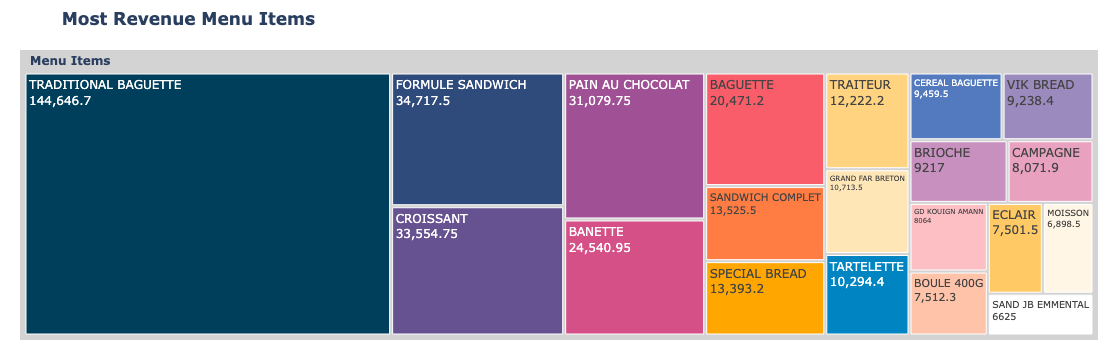

In [351]:
import plotly.express as px

# Build treemap for revenue
fig = px.treemap(
    data_frame=best_sellers_revenue.reset_index().head(20),  # top 20 products
    path=[px.Constant('<b> Menu Items'), 'article'],         # root + product names
    values='revenue',
    title='<b> Most Revenue Menu Items',
)

# Customize
fig.data[0].textinfo = 'label+text+value'
fig.update_traces(root_color='lightgrey')
fig.update_layout(
    treemapcolorway=['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087',
                     '#f95d6a', '#ff7c43', '#ffa600', '#ffd380', '#ffe6b7'],
    margin=dict(t=50, l=20, r=20, b=20)
)

fig.show()


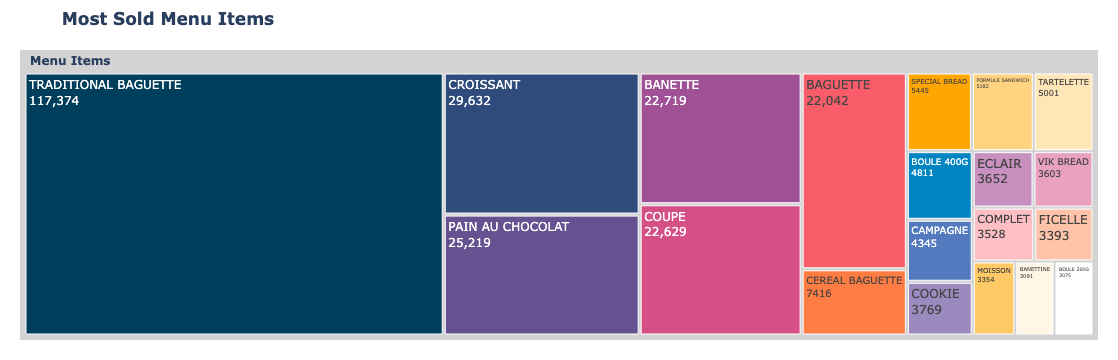

In [353]:
fig = px.treemap(
    data_frame=best_sellers_quantity.reset_index().head(20), 
    path=[px.Constant('<b> Menu Items'), 'article'],
    values='quantity',
    title='<b> Most Sold Menu Items',
)

fig.data[0].textinfo = 'label+text+value'
fig.update_traces(root_color='lightgrey')
fig.update_layout(
    treemapcolorway=['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087',
                     '#f95d6a', '#ff7c43', '#ffa600', '#ffd380', '#ffe6b7'],
    margin=dict(t=50, l=20, r=20, b=20)
)

fig.show()

# RQ2: When are sales the highest?

In [356]:
df.head(5)

date   time  ticket_number               article  quantity  price  \
0  2021-01-02  08:38       150040.0              BAGUETTE         1   0.90   
1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT         3   1.20   
2  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT         2   1.20   
3  2021-01-02  09:14       150041.0                  PAIN         1   1.15   
4  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE         5   1.20   

            timestamp  revenue  day_name    month  hour  
0 2021-01-02 08:38:00     0.90  Saturday  January     8  
1 2021-01-02 08:38:00     3.60  Saturday  January     8  
2 2021-01-02 09:14:00     2.40  Saturday  January     9  
3 2021-01-02 09:14:00     1.15  Saturday  January     9  
4 2021-01-02 09:25:00     6.00  Saturday  January     9

In [358]:
# based on hour
sales_by_hour = df.groupby('hour')['revenue'].sum().sort_values(ascending=False)

In [360]:
sales_by_hour.head(10)

hour
11    111419.16
12    100578.75
10     94968.00
9      80374.90
8      67716.60
17     24081.40
18     20659.90
16     18944.02
7      17988.70
13     17764.82
Name: revenue, dtype: float64

In [362]:
# based on day of the week
sales_by_day = df.groupby('day_name')['revenue'].sum()
days_order= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sales_by_day = sales_by_day.reindex(days_order)

In [364]:
sales_by_day

day_name
Monday        73832.80
Tuesday       67199.00
Wednesday     49952.60
Thursday      70085.98
Friday        76929.57
Saturday      93597.27
Sunday       126167.23
Name: revenue, dtype: float64

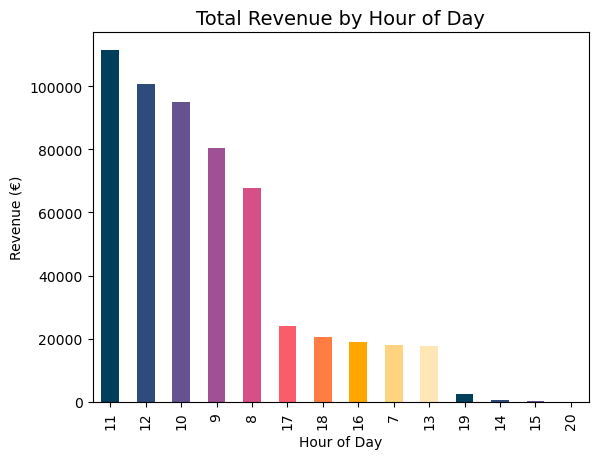

In [366]:
# By Hour
sales_by_hour.plot(
    kind='bar', 
    color=colors, title="Total Revenue by Hour of Day")
plt.title("Total Revenue by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Revenue (€)")
plt.show()

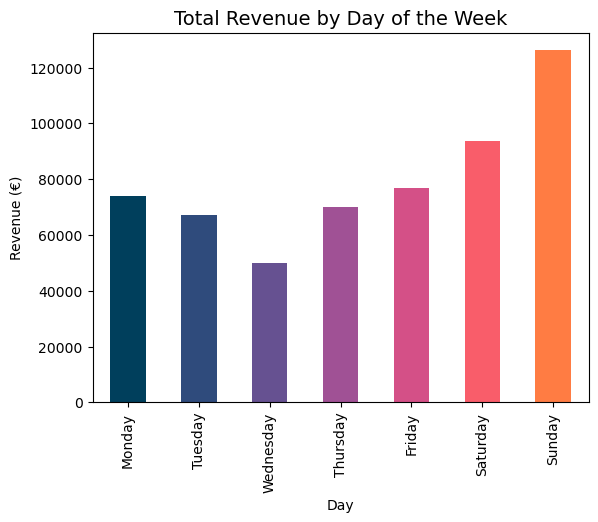

In [368]:
# By Day
sales_by_day.plot(
    kind='bar', 
    color=colors, title="Total Revenue by Day of the Week")
plt.title("Total Revenue by Day of the Week", fontsize=14)
plt.xlabel("Day")
plt.ylabel("Revenue (€)")
plt.show()

In [370]:
sales_day_hour = (
    df.groupby(['day_name','hour'])['revenue']
      .sum()
      .reset_index()
)
sales_day_hour

day_name  hour   revenue
0      Friday     7   2815.45
1      Friday     8   8224.95
2      Friday     9   8916.90
3      Friday    10  10723.95
4      Friday    11  14278.50
..        ...   ...       ...
85  Wednesday    16   2144.05
86  Wednesday    17   2936.15
87  Wednesday    18   2646.20
88  Wednesday    19    330.55
89  Wednesday    20      3.35

[90 rows x 3 columns]

In [372]:
peak_hours = (
    sales_day_hour.loc[
        sales_day_hour.groupby('day_name')['revenue'].idxmax()
    ]
    .sort_values('revenue', ascending=False)
)

In [374]:
peak_hours

day_name  hour   revenue
44     Sunday    11  29561.60
31   Saturday    11  17909.45
5      Friday    12  15828.85
18     Monday    12  14707.00
52   Thursday    11  13718.71
67    Tuesday    12  13645.70
81  Wednesday    12  10190.35

In [376]:
pivot = sales_day_hour.pivot(index='day_name', columns='hour', values='revenue')

# Reorder rows so days go Monday → Sunday
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
pivot = pivot.reindex(days_order)

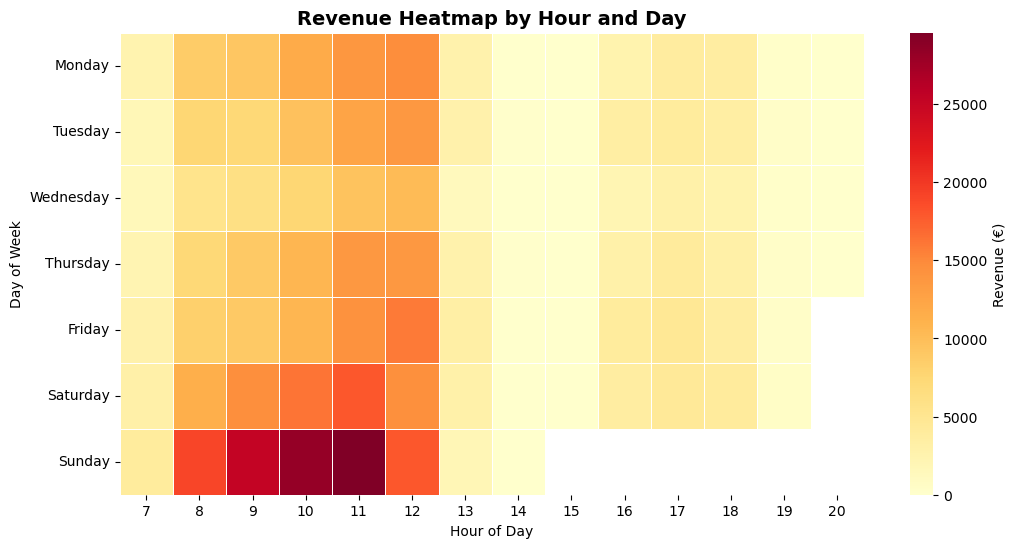

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(
    pivot, 
    cmap="YlOrRd",         # Yellow→Orange→Red (like intensity of sales)
    linewidths=0.5,        # thin lines between cells
    cbar_kws={'label':'Revenue (€)'}
)

plt.title("Revenue Heatmap by Hour and Day", fontsize=14, fontweight="bold")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# RQ3: Which products are frequently bought together?

In [381]:
# creating baskets
baskets = (
    df.groupby('ticket_number')['article']
    .apply(list)
    .reset_index()
    .rename(columns={'article':'items'})

SyntaxError: incomplete input (3341371394.py, line 6)

In [383]:
baskets = (
    df.groupby('ticket_number')['article']
      .apply(list)   # turn into list of items
      .reset_index()
      .rename(columns={'article':'items'})
)

In [384]:
baskets

ticket_number                                              items
0            150040.0                       [BAGUETTE, PAIN AU CHOCOLAT]
1            150041.0                           [PAIN AU CHOCOLAT, PAIN]
2            150042.0                             [TRADITIONAL BAGUETTE]
3            150043.0                              [BAGUETTE, CROISSANT]
4            150044.0                                          [BANETTE]
...               ...                                                ...
136445       288908.0                                  [CEREAL BAGUETTE]
136446       288910.0                             [TRADITIONAL BAGUETTE]
136447       288911.0  [CAMPAGNE, TRADITIONAL BAGUETTE, COUPE, BOULE ...
136448       288912.0                             [TRADITIONAL BAGUETTE]
136449       288913.0                             [TRADITIONAL BAGUETTE]

[136450 rows x 2 columns]

In [387]:
from itertools import combinations
from collections import Counter

pair_counter = Counter()

for items in baskets['items']:
    if len(items)>1:
        pairs = combinations(sorted(set(items)),2)
        pair_counter.update(pairs)

In [389]:
pairs_df = (
    pd.DataFrame(pair_counter.items(), columns=['pair','count'])
    .sort_values(by='count', ascending=False)
)

In [391]:
pairs_df.head(10)

pair  count
22             (COUPE, TRADITIONAL BAGUETTE)   6116
4              (CROISSANT, PAIN AU CHOCOLAT)   5394
3          (CROISSANT, TRADITIONAL BAGUETTE)   4927
5   (PAIN AU CHOCOLAT, TRADITIONAL BAGUETTE)   4205
14                       (BOULE 400G, COUPE)   3242
16                         (CAMPAGNE, COUPE)   3112
8                     (COUPE, SPECIAL BREAD)   3049
12                       (BOULE 200G, COUPE)   2385
93                          (COMPLET, COUPE)   2314
76                        (COUPE, VIK BREAD)   2294

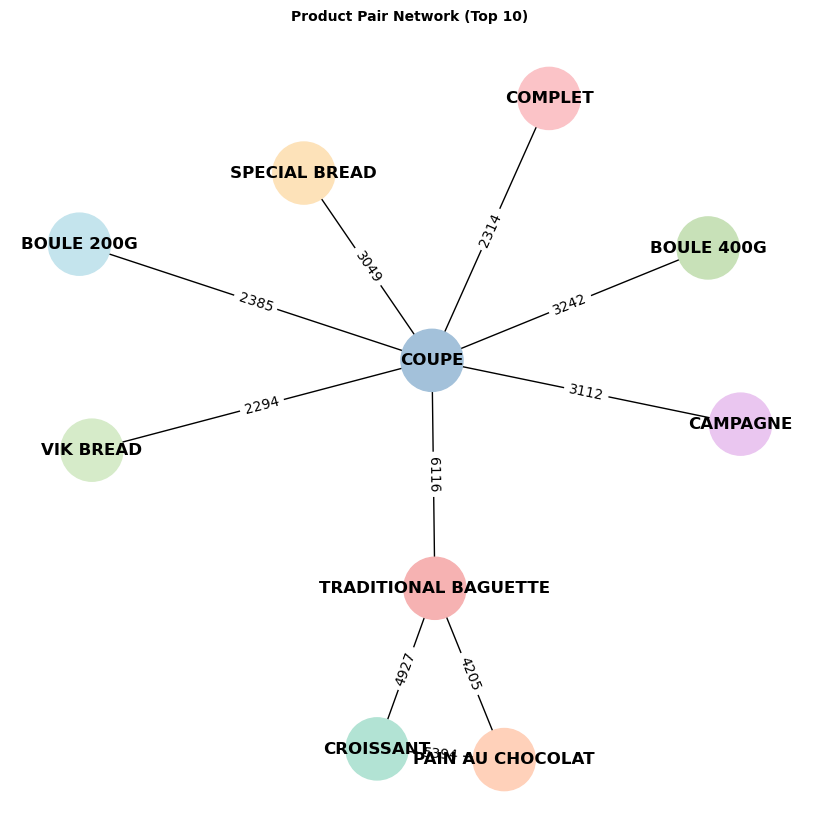

In [393]:
import networkx as nx

colors_1 = ['#A3C1DA','#F6B2B2','#B2E3D4','#FFD1BA','#C8E1B8',
          '#EAC6F0','#FDE2B9','#C4E4ED','#FBC3C7','#D6EBC9']

top_pairs = pairs_df.head(10)
G = nx.Graph()
for _, row in top_pairs.iterrows():
    item1, item2 = row['pair']
    G.add_edge(item1, item2, weight=row['count'])

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color=colors_1, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['weight'] for u,v,d in G.edges(data=True)})
plt.title("Product Pair Network (Top 10)", fontsize=10, fontweight="bold")
plt.show()

# RQ4: Are cheap items driving traffic or revenue?

In [396]:
df.head(5)

date   time  ticket_number               article  quantity  price  \
0  2021-01-02  08:38       150040.0              BAGUETTE         1   0.90   
1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT         3   1.20   
2  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT         2   1.20   
3  2021-01-02  09:14       150041.0                  PAIN         1   1.15   
4  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE         5   1.20   

            timestamp  revenue  day_name    month  hour  
0 2021-01-02 08:38:00     0.90  Saturday  January     8  
1 2021-01-02 08:38:00     3.60  Saturday  January     8  
2 2021-01-02 09:14:00     2.40  Saturday  January     9  
3 2021-01-02 09:14:00     1.15  Saturday  January     9  
4 2021-01-02 09:25:00     6.00  Saturday  January     9

In [398]:
cheap_items = df[df['price']<1]['article'].unique()
print(cheap_items)

['BAGUETTE' 'BANETTINE' 'COUPE' 'FICELLE' 'DEMI BAGUETTE' 'SUCETTE'
 'DIVERS SANDWICHS' 'GRANDE SUCETTE' 'DEMI PAIN' 'DIVERS VIENNOISERIE'
 'BRIOCHETTE' 'DIVERS BOULANGERIE' 'FINANCIER' 'PAIN NOIR' 'BOTTEREAU'
 'DIVERS CONFISERIE']


In [400]:
cheap_stats = (
    df[df['article'].isin(cheap_items)]
    .groupby('article')
    .agg(total_qty = ('quantity', 'sum'), total_rev = ('revenue', 'sum')))

In [402]:
print(cheap_stats)

                     total_qty  total_rev
article                                  
BAGUETTE                 22042   20471.20
BANETTINE                 3091    1950.65
BOTTEREAU                  389     194.50
BRIOCHETTE                  86      70.20
COUPE                    22629    3394.35
DEMI BAGUETTE             1145     538.45
DEMI PAIN                  163     105.05
DIVERS BOULANGERIE         316     794.95
DIVERS CONFISERIE          500    1804.43
DIVERS SANDWICHS           233     821.17
DIVERS VIENNOISERIE        830    4253.65
FICELLE                   3393    2132.75
FINANCIER                   20      14.00
GRANDE SUCETTE             344     206.40
PAIN NOIR                    1       0.60
SUCETTE                   1061     318.30


In [412]:
cheap_stats['pct_qty'] = cheap_stats['total_qty']/ df['quantity'].sum() * 100
cheap_stats['pct_rev'] = cheap_stats['total_rev']/ df['revenue'].sum() * 100

In [414]:
print(cheap_stats)

                     total_qty  total_rev   pct_qty   pct_rev
article                                                      
BAGUETTE                 22042   20471.20  6.144728  3.670223
BANETTINE                 3091    1950.65  0.861689  0.349726
BOTTEREAU                  389     194.50  0.108443  0.034871
BRIOCHETTE                  86      70.20  0.023975  0.012586
COUPE                    22629    3394.35  6.308368  0.608563
DEMI BAGUETTE             1145     538.45  0.319196  0.096537
DEMI PAIN                  163     105.05  0.045440  0.018834
DIVERS BOULANGERIE         316     794.95  0.088092  0.142524
DIVERS CONFISERIE          500    1804.43  0.139387  0.323511
DIVERS SANDWICHS           233     821.17  0.064954  0.147225
DIVERS VIENNOISERIE        830    4253.65  0.231382  0.762625
FICELLE                   3393    2132.75  0.945879  0.382375
FINANCIER                   20      14.00  0.005575  0.002510
GRANDE SUCETTE             344     206.40  0.095898  0.037005
PAIN NOI

In [432]:
cheap_stats.sort_values('pct_qty', ascending=False).head(5)
cheap_stats.sort_values('pct_rev', ascending=False).head(5)

total_qty  total_rev   pct_qty   pct_rev      diff
article                                                                
BAGUETTE                 22042   20471.20  6.144728  3.670223  2.474505
DIVERS VIENNOISERIE        830    4253.65  0.231382  0.762625 -0.531243
COUPE                    22629    3394.35  6.308368  0.608563  5.699805
FICELLE                   3393    2132.75  0.945879  0.382375  0.563504
BANETTINE                 3091    1950.65  0.861689  0.349726  0.511963

<Axes: title={'center': 'Cheap Items: Traffic vs Revenue'}, xlabel='article'>

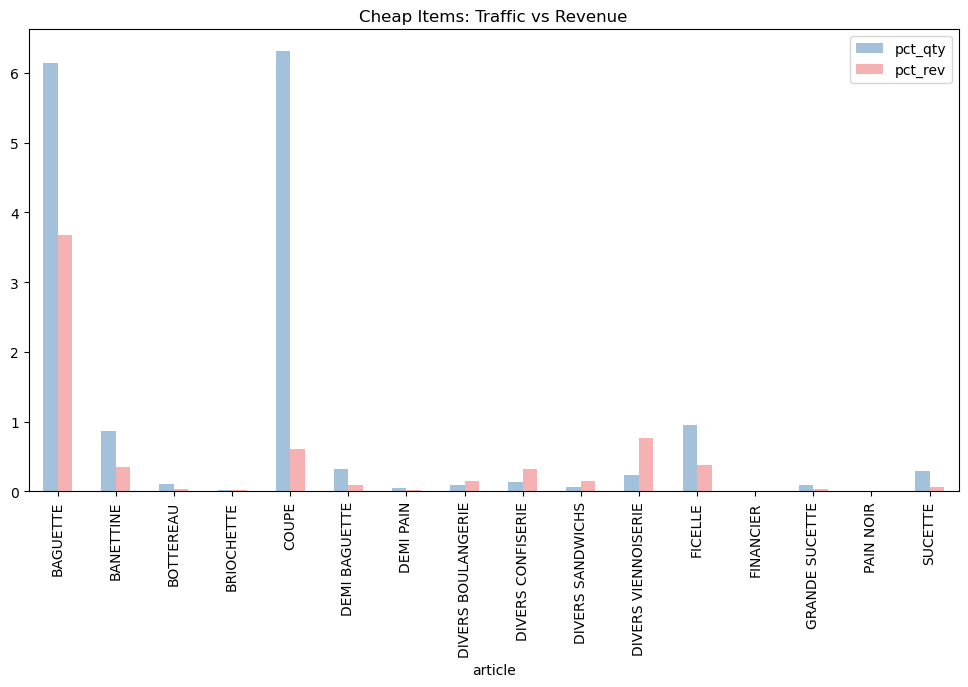

In [434]:
cheap_stats[['pct_qty','pct_rev']].plot(
    kind='bar', figsize=(12,6), color=['#A3C1DA','#F6B2B2'], title="Cheap Items: Traffic vs Revenue"
)

In [420]:
cheap_stats_sorted = cheap_stats.sort_values('total_qty', ascending=False)

In [422]:
cheap_stats_sorted

total_qty  total_rev   pct_qty   pct_rev
article                                                      
COUPE                    22629    3394.35  6.308368  0.608563
BAGUETTE                 22042   20471.20  6.144728  3.670223
FICELLE                   3393    2132.75  0.945879  0.382375
BANETTINE                 3091    1950.65  0.861689  0.349726
DEMI BAGUETTE             1145     538.45  0.319196  0.096537
SUCETTE                   1061     318.30  0.295779  0.057067
DIVERS VIENNOISERIE        830    4253.65  0.231382  0.762625
DIVERS CONFISERIE          500    1804.43  0.139387  0.323511
BOTTEREAU                  389     194.50  0.108443  0.034871
GRANDE SUCETTE             344     206.40  0.095898  0.037005
DIVERS BOULANGERIE         316     794.95  0.088092  0.142524
DIVERS SANDWICHS           233     821.17  0.064954  0.147225
DEMI PAIN                  163     105.05  0.045440  0.018834
BRIOCHETTE                  86      70.20  0.023975  0.012586
FINANCIER                   20      14.00  0.005575  0.002510
PAIN NOIR                    1       0.60  0.000279  0.000108

<Axes: title={'center': 'Cheap Items: Traffic vs Revenue'}, xlabel='article'>

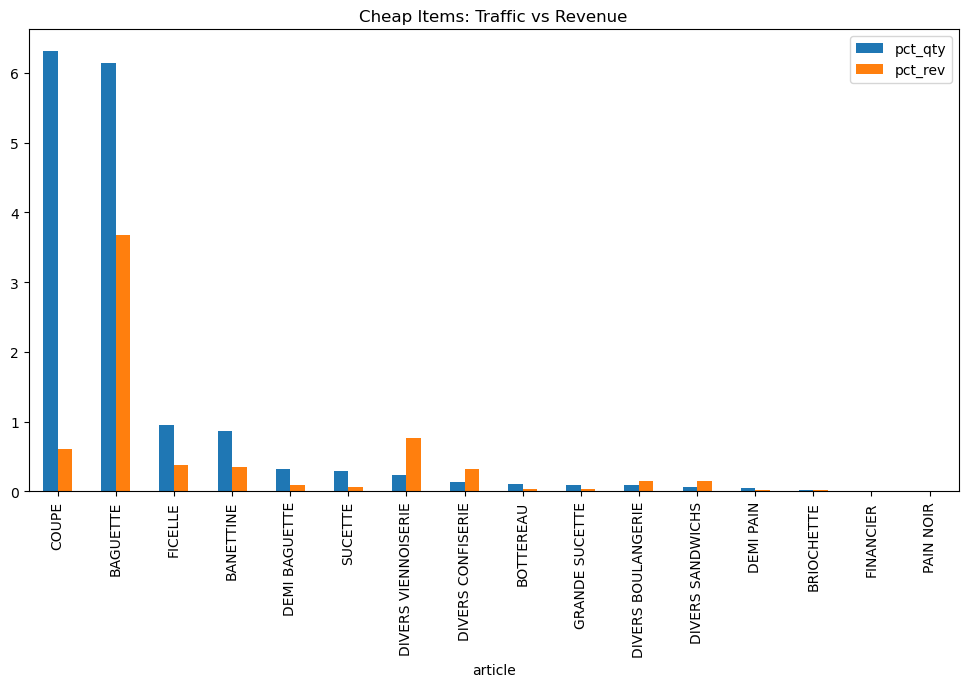

In [424]:
cheap_stats_sorted[['pct_qty','pct_rev']].plot(
    kind='bar', figsize=(12,6),
    title="Cheap Items: Traffic vs Revenue"
)

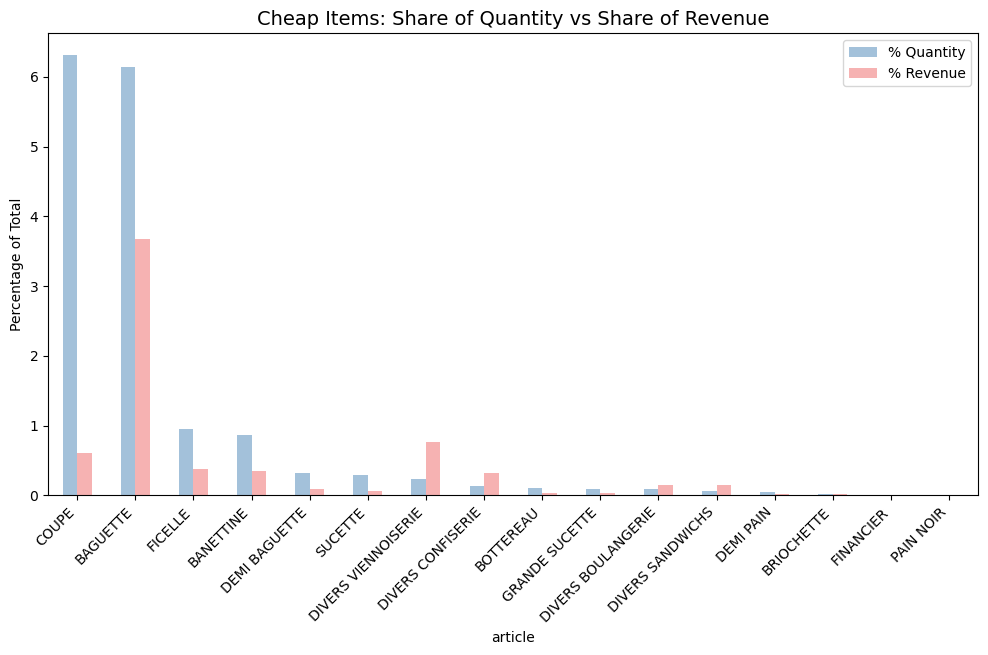

In [428]:
cheap_stats['diff'] = cheap_stats['pct_qty'] - cheap_stats['pct_rev']
cheap_stats_sorted = cheap_stats.sort_values('pct_qty', ascending=False)
import matplotlib.pyplot as plt

ax = cheap_stats_sorted[['pct_qty','pct_rev']].plot(
    kind='bar',
    figsize=(12,6),
    color=['#A3C1DA','#F6B2B2'],   # pastel blue & pastel coral
)

plt.title("Cheap Items: Share of Quantity vs Share of Revenue", fontsize=14)
plt.ylabel("Percentage of Total")
plt.xticks(rotation=45, ha='right')
plt.legend(['% Quantity','% Revenue'])
plt.show()


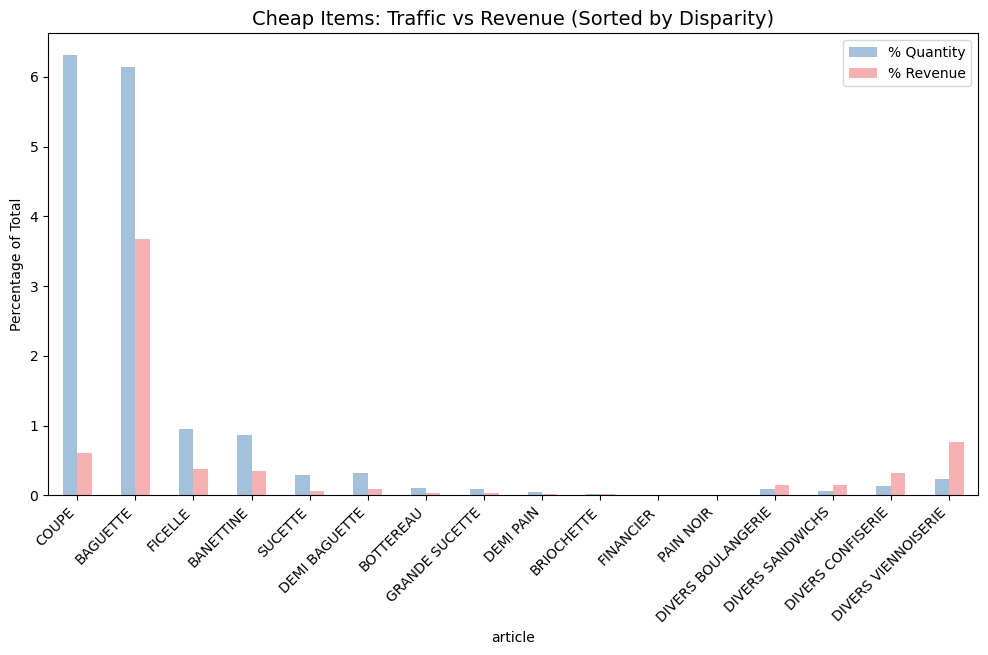

In [440]:
cheap_stats_sorted = cheap_stats.sort_values('diff', ascending=False)

ax = cheap_stats_sorted[['pct_qty','pct_rev']].plot(
    kind='bar',
    figsize=(12,6),
    color=['#A3C1DA','#F6B2B2'],   # pastel blue & pastel coral
)

plt.title("Cheap Items: Traffic vs Revenue (Sorted by Disparity)", fontsize=14)
plt.ylabel("Percentage of Total")
plt.xticks(rotation=45, ha='right')
plt.legend(['% Quantity','% Revenue'])
plt.show()

# RQ5: What is the overall revenue trend over time?

### calculate daily revenue

In [444]:
df.head(5)

date   time  ticket_number               article  quantity  price  \
0  2021-01-02  08:38       150040.0              BAGUETTE         1   0.90   
1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT         3   1.20   
2  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT         2   1.20   
3  2021-01-02  09:14       150041.0                  PAIN         1   1.15   
4  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE         5   1.20   

            timestamp  revenue  day_name    month  hour  
0 2021-01-02 08:38:00     0.90  Saturday  January     8  
1 2021-01-02 08:38:00     3.60  Saturday  January     8  
2 2021-01-02 09:14:00     2.40  Saturday  January     9  
3 2021-01-02 09:14:00     1.15  Saturday  January     9  
4 2021-01-02 09:25:00     6.00  Saturday  January     9

In [446]:
daily_revenue = df.groupby('date')['revenue'].sum().reset_index()

In [450]:
print(daily_revenue)

           date  revenue
0    2021-01-02   985.75
1    2021-01-03  1014.30
2    2021-01-04   461.90
3    2021-01-05   515.55
4    2021-01-07   544.00
..          ...      ...
595  2022-09-26   693.75
596  2022-09-27   745.15
597  2022-09-28   610.55
598  2022-09-29   689.20
599  2022-09-30   793.35

[600 rows x 2 columns]


### calculate monthly revenue

In [454]:
monthly_revenue = df.groupby(df['timestamp'].dt.to_period('M'))['revenue'].sum().reset_index()

In [456]:
monthly_revenue

timestamp   revenue
0    2021-01  15234.02
1    2021-02  16809.70
2    2021-03  20067.85
3    2021-04  24627.45
4    2021-05  29578.05
5    2021-06  24581.60
6    2021-07  42017.60
7    2021-08  48539.50
8    2021-09  22708.00
9    2021-10  22682.05
10   2021-11  18025.75
11   2021-12  18999.25
12   2022-01  15663.50
13   2022-02  17604.20
14   2022-03  19322.91
15   2022-04  24653.90
16   2022-05  29266.95
17   2022-06  25259.15
18   2022-07  46545.82
19   2022-08  53772.45
20   2022-09  21804.75

In [460]:
monthly_revenue.dtypes

timestamp    period[M]
revenue        float64
dtype: object

In [462]:
monthly_revenue['timestamp'] = monthly_revenue['timestamp'].dt.to_timestamp()


In [468]:
weekly_revenue = df.resample('W-MON', on='timestamp')['revenue'].sum().reset_index()

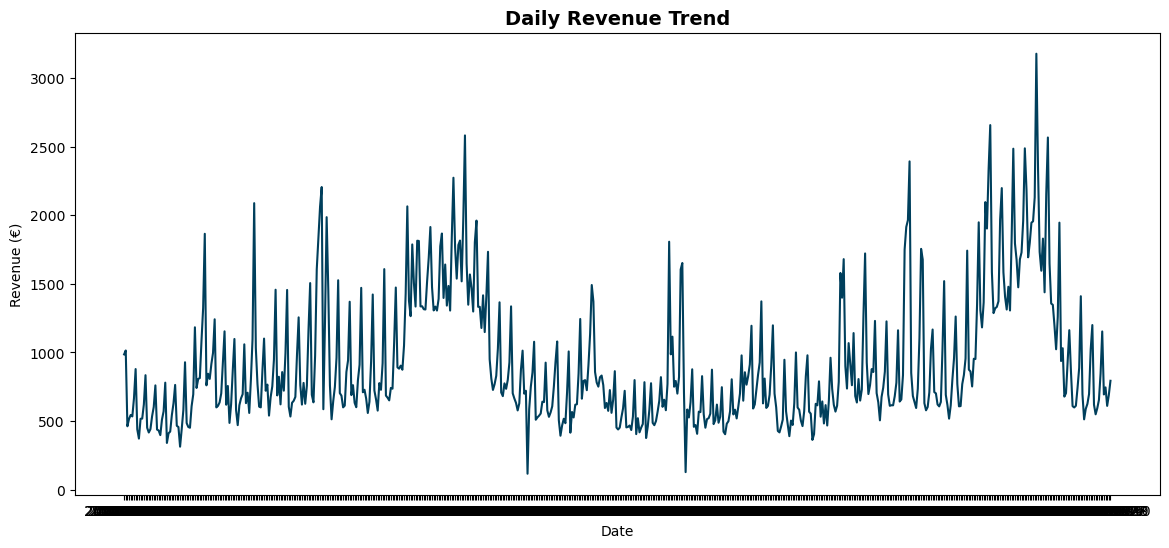

In [464]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(daily_revenue['date'], daily_revenue['revenue'], color="#003f5c")
plt.title("Daily Revenue Trend", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Revenue (€)")
plt.show()

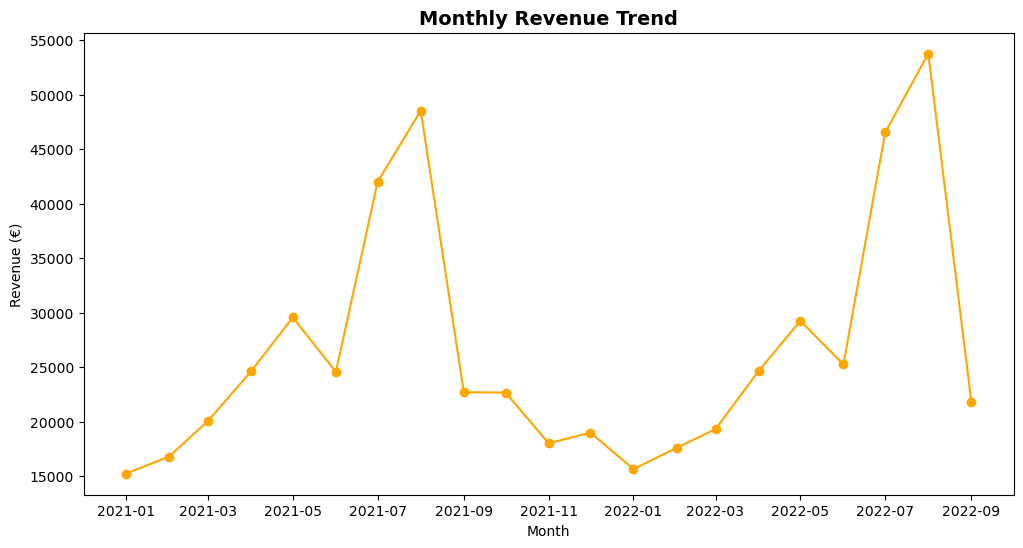

In [466]:
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue['timestamp'], monthly_revenue['revenue'], marker='o', color="#ffa600")
plt.title("Monthly Revenue Trend", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Revenue (€)")
plt.show()

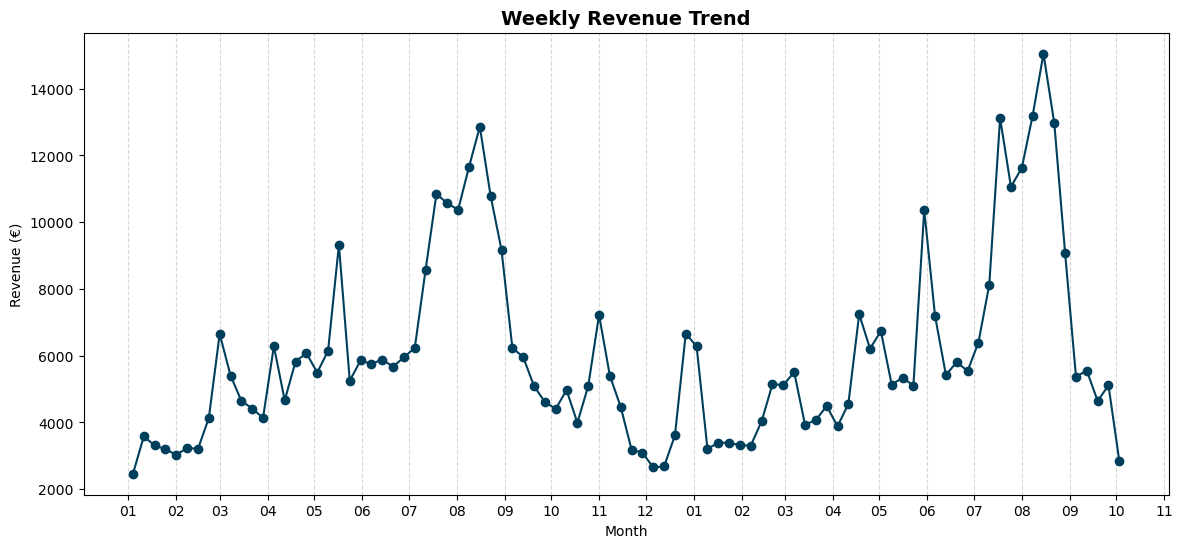

In [472]:
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
plt.plot(weekly_revenue['timestamp'], weekly_revenue['revenue'], marker='o', color="#003f5c")

plt.title("Weekly Revenue Trend", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Revenue (€)")

# Major ticks: every month (gridlines)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format x-axis with numeric month (01, 02, …)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m"))

# Add vertical gridlines at each tick
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.show()
